In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 512  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOptionXVAPaper.pth")

In [5]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(15):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
Y_pred = Y_pred * 100

In [7]:
graph = model.iteration, model.training_loss

In [8]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

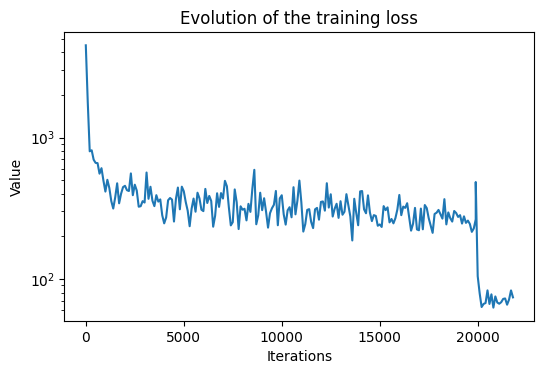

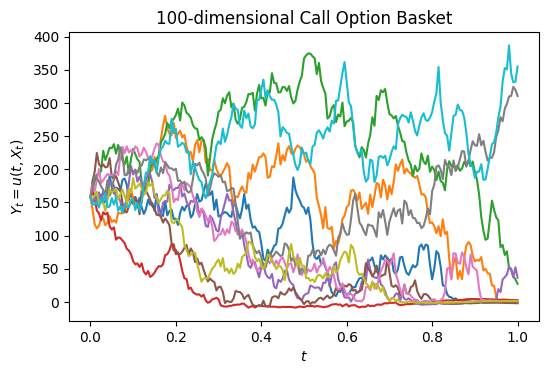

In [45]:
plt.figure(figsize=figsize(1.0))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 10
plt.savefig('Figures/100DCallOptionBasketLoss.pdf')
plt.figure(figsize=figsize(1.0))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T)


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Call Option Basket')
plt.savefig('Figures/100DCallOptionBasketPreds.pdf')
plt.show()

In [12]:
Y_pred.shape

(8192, 201, 1)

In [13]:
Y_preds = Y_pred.reshape(8192, 201)

In [14]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [15]:
Y_preds[:,0][:,None]

array([[158.00458],
       [158.00458],
       [158.00458],
       ...,
       [158.00458],
       [158.00458],
       [158.00458]], dtype=float32)

In [16]:
Y_preds

array([[ 1.58004578e+02,  1.65134277e+02,  1.62668747e+02, ...,
         9.85257328e-01,  8.32952559e-01,  5.31034172e-01],
       [ 1.58004578e+02,  1.39245850e+02,  1.17253670e+02, ...,
         7.00549781e-01,  3.28834355e-01,  4.01857495e-01],
       [ 1.58004578e+02,  1.70270844e+02,  1.81874466e+02, ...,
         3.85542030e+01,  3.39947281e+01,  2.74370155e+01],
       ...,
       [ 1.58004578e+02,  1.26925385e+02,  1.19351242e+02, ...,
         1.90115158e+02,  1.64349350e+02,  1.48248306e+02],
       [ 1.58004578e+02,  1.56573853e+02,  1.33777649e+02, ...,
         1.77288651e+00,  1.62028670e+00,  1.66253150e+00],
       [ 1.58004578e+02,  1.82492325e+02,  1.79103241e+02, ...,
        -2.92062759e-04, -9.10148025e-02, -1.51136518e-01]], dtype=float32)

In [17]:
r = 0.01

In [18]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([158.00061, 158.15735, 158.41565, 158.33046, 158.5429 , 158.6422 ,
       158.53397, 158.72618, 158.73215, 158.71642, 158.77032, 158.61147,
       158.70213, 158.78488, 158.8276 , 158.71011, 158.81152, 158.85532,
       159.07787, 159.05795, 159.20033, 159.03778, 158.67857, 158.56592,
       158.77739, 158.92995, 158.91359, 159.08992, 159.17567, 159.09274,
       158.94879, 159.09222, 158.86432, 158.70645, 158.59865, 158.79025,
       158.75584, 158.72157, 158.73074, 158.512  , 158.62086, 158.51154,
       158.31273, 158.22455, 158.14474, 158.41615, 158.45937, 158.52641,
       158.2661 , 158.35428, 158.46248, 158.49168, 158.35315, 158.55103,
       158.60455, 158.56517, 158.67409, 158.63217, 158.48282, 158.39116,
       158.37637, 158.42989, 158.29709, 158.6261 , 158.7792 , 158.55048,
       158.60356, 158.36882, 158.42409, 158.50916, 158.50153, 158.45343,
       158.5177 , 158.49   , 158.54042, 158.32158, 158.37857, 158.29053,
       158.08641, 158.19678, 158.14857, 158.12674, 

In [19]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.30867838e-05,  0.00000000e+00, -5.10045502e-05,
       -2.05469787e-05,  0.00000000e+00,  0.00000000e+00, -2.12943763e-04,
       -2.86478549e-04, -6.43303210e-04, -1.19816966e-03, -2.01092660e-03,
       -2.59393407e-03, -

In [20]:
from scipy.stats import multivariate_normal as normal

dw_sample = normal.rvs(size=[50000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([50000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([50000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [21]:
np.random.seed(37)
dw_sample1 = normal.rvs(size=[50000, D, N]) * np.sqrt(T/N)
x_sample1 = np.zeros([50000, D, N + 1]) 
x_sample1[:, :, 0] = np.ones([50000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample1[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample1[:, :, i])) * x_sample1[:, :, i]

In [22]:
portfolio1 = np.sum(x_sample, axis=1, keepdims=True)
portfolio2 = np.sum(x_sample1, axis=1, keepdims=True)

In [23]:
payoff1 = np.maximum(portfolio1 - 100 * 100, 0)
payoff2 = np.maximum(portfolio2 - 100 * 100, 0)

In [24]:
average_1 = np.mean(payoff1, axis=0, keepdims=True)
average_2 = np.mean(payoff2, axis=0, keepdims=True)

In [25]:
average = (average_1 + average_2)/ 2

In [26]:
mc_price = np.exp(-0.01 * 1) * average[:, :, 200]

In [27]:
mc_price

array([[158.37586814]])

In [28]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

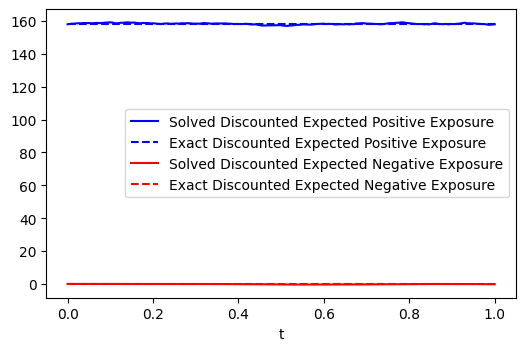

In [46]:
fig = plt.figure(figsize=figsize(1.0))
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'b--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'r--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()
plt.savefig('Figures/100DCallOptionBasketExposures.pdf')

plt.show()

In [31]:
np.mean((epe_exact - epe)**2 / epe_exact ** 2) 

8.433612104312458e-06

In [32]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

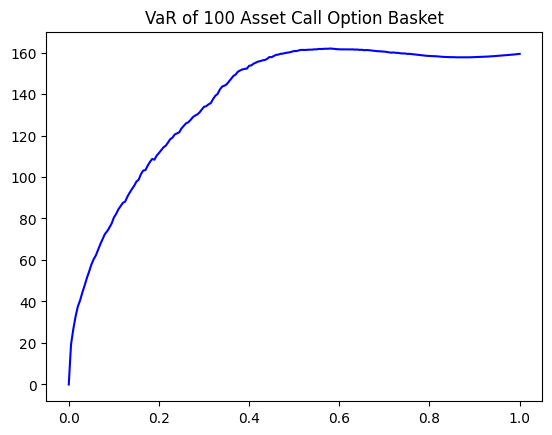

In [33]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [34]:
rate = 0.01
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [35]:
Y_preds

array([[ 1.58004578e+02,  1.65134277e+02,  1.62668747e+02, ...,
         9.85257328e-01,  8.32952559e-01,  5.31034172e-01],
       [ 1.58004578e+02,  1.39245850e+02,  1.17253670e+02, ...,
         7.00549781e-01,  3.28834355e-01,  4.01857495e-01],
       [ 1.58004578e+02,  1.70270844e+02,  1.81874466e+02, ...,
         3.85542030e+01,  3.39947281e+01,  2.74370155e+01],
       ...,
       [ 1.58004578e+02,  1.26925385e+02,  1.19351242e+02, ...,
         1.90115158e+02,  1.64349350e+02,  1.48248306e+02],
       [ 1.58004578e+02,  1.56573853e+02,  1.33777649e+02, ...,
         1.77288651e+00,  1.62028670e+00,  1.66253150e+00],
       [ 1.58004578e+02,  1.82492325e+02,  1.79103241e+02, ...,
        -2.92062759e-04, -9.10148025e-02, -1.51136518e-01]], dtype=float32)

In [36]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [37]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [38]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [39]:
dva = np.sum(phi_dva.reshape(8192,1,201), axis=-1) - (phi_dva.reshape(8192,1,201)[:,:,-1] + phi_dva.reshape(8192,1,201)[:,:,0])/2

In [40]:
dva

array([[102.39203741],
       [177.79118971],
       [276.4051602 ],
       ...,
       [205.02797231],
       [163.30099344],
       [223.50672703]])

In [41]:
dva[:,0] * T/N

array([0.51196019, 0.88895595, 1.3820258 , ..., 1.02513986, 0.81650497,
       1.11753364])

In [42]:
dva_pred = np.mean(dva[:,0] * T/N)
dva_pred

0.8994691983121575

In [43]:
dva_exact = np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N
dva_exact

0.8999363669894553

In [44]:
np.mean((dva_exact - dva_pred)**2 / dva_exact ** 2) 

2.694783183296497e-07

In [45]:
model.save_model("models/100DCallOptionXVAPaper.pth")